# Перцептрон

# Методические указания

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

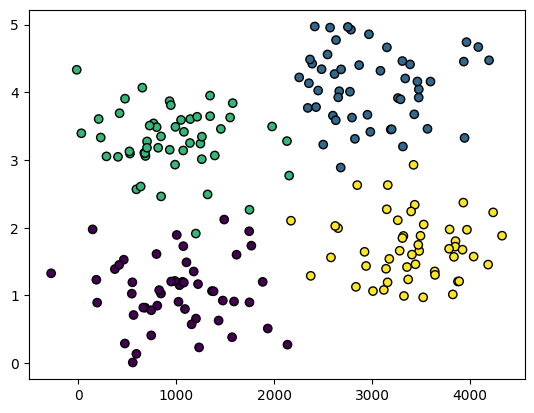

In [18]:
from sklearn.datasets import make_blobs


blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [19]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X, y)


print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [20]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.09809877 -0.58903611], 
0 1 [ 0.33667051 -0.31219238], 
0 2 [-0.82024119 -0.22424296], 
0 3 [-0.29720839  0.11423652], 
0 4 [-0.56852789 -0.18324369], 
0 5 [-0.66056109  0.37321781], 

1 0 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
1 1 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
1 2 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
1 3 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



In [21]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


In [22]:
from sklearn.metrics import confusion_matrix


confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]])

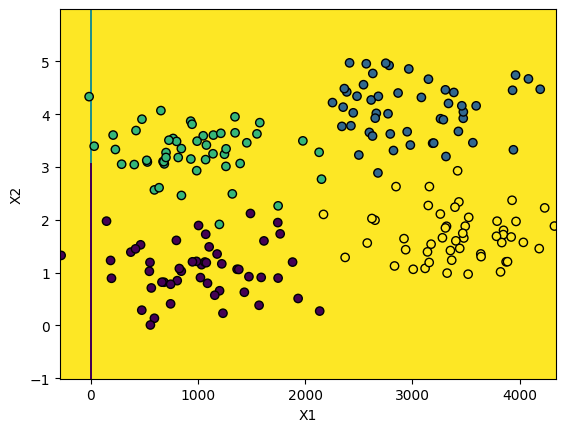

In [23]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.metrics import confusion_matrix


confusion_matrix(y, clf.predict(X_scaled))

array([[ 0,  9,  0, 41],
       [ 0, 50,  0,  0],
       [ 0, 22, 28,  0],
       [ 0, 50,  0,  0]])

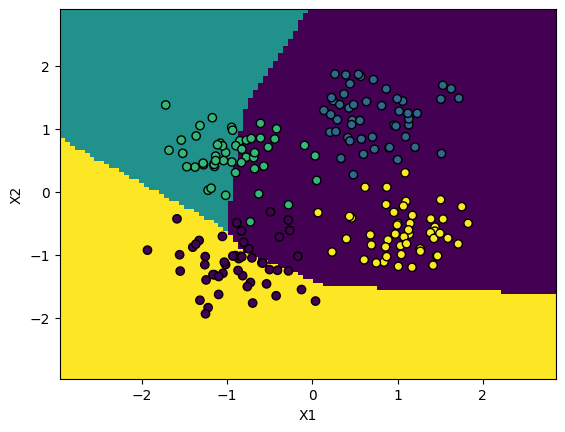

In [25]:
X0 = np.linspace(X_scaled[:, 0].min()-1, X_scaled[:, 0].max()+1, 100)
X1 = np.linspace(X_scaled[:, 1].min()-1, X_scaled[:, 1].max()+1, 100)
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)

plt.pcolormesh(X0_grid, X1_grid, y_predict, shading='auto')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='black', linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Iteration 1, loss = 1.51722248
Iteration 2, loss = 1.51313947
Iteration 3, loss = 1.50907129
Iteration 4, loss = 1.50501825
Iteration 5, loss = 1.50098082
Iteration 6, loss = 1.49696581
Iteration 7, loss = 1.49298429
Iteration 8, loss = 1.48904713
Iteration 9, loss = 1.48513647
Iteration 10, loss = 1.48124473
Iteration 11, loss = 1.47737839
Iteration 12, loss = 1.47354203
Iteration 13, loss = 1.46974489
Iteration 14, loss = 1.46597118
Iteration 15, loss = 1.46221825
Iteration 16, loss = 1.45848766
Iteration 17, loss = 1.45477827
Iteration 18, loss = 1.45108872
Iteration 19, loss = 1.44742447
Iteration 20, loss = 1.44378511
Iteration 21, loss = 1.44017361
Iteration 22, loss = 1.43658116
Iteration 23, loss = 1.43301059
Iteration 24, loss = 1.42946080
Iteration 25, loss = 1.42592831
Iteration 26, loss = 1.42241295
Iteration 27, loss = 1.41891968
Iteration 28, loss = 1.41544235
Iteration 29, loss = 1.41197955
Iteration 30, loss = 1.40853456
Iteration 31, loss = 1.40510877
Iteration 32, los

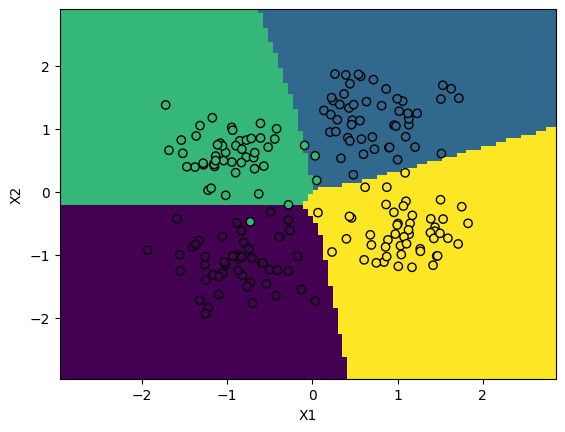

In [26]:
clf = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10_000, verbose=True).fit(X_scaled, y)

X0 = np.linspace(X_scaled[:, 0].min()-1, X_scaled[:, 0].max()+1, 100)
X1 = np.linspace(X_scaled[:, 1].min()-1, X_scaled[:, 1].max()+1, 100)
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)

plt.pcolormesh(X0_grid, X1_grid, y_predict, shading='auto')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='black', linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

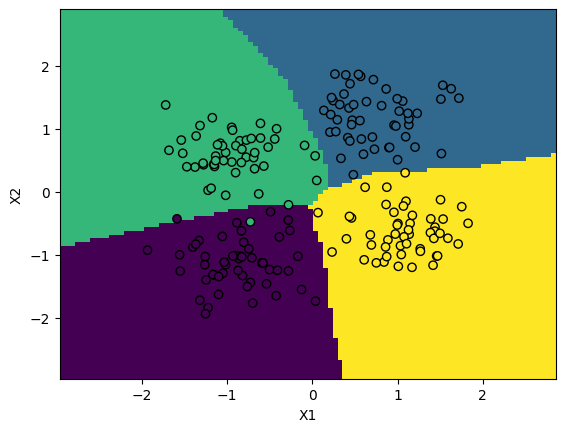

In [27]:
clf = MLPClassifier(hidden_layer_sizes=(6, 6, 6), max_iter=10_000).fit(X_scaled, y)

X0 = np.linspace(X_scaled[:, 0].min()-1, X_scaled[:, 0].max()+1, 100)
X1 = np.linspace(X_scaled[:, 1].min()-1, X_scaled[:, 1].max()+1, 100)
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)

plt.pcolormesh(X0_grid, X1_grid, y_predict, shading='auto')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='black', linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Задания для самостоятельного выполнения

### 1. Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов

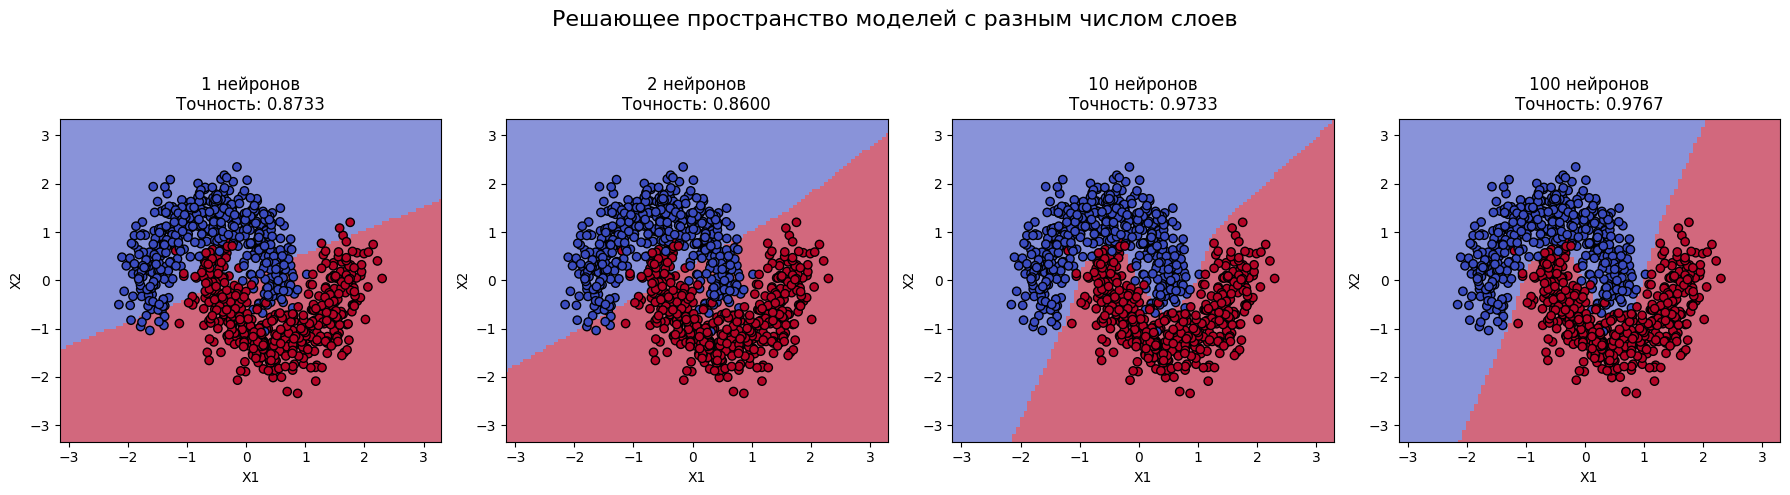

In [28]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = np.vstack((X_train_scaled, X_test_scaled))
y_full = np.hstack((y_train, y_test))

neurons = [1, 2, 10, 100]
results = {}

fig, axes = plt.subplots(1, 4, figsize=(18, 5))
fig.suptitle('Решающее пространство моделей с разным числом слоев', fontsize=16)

for idx, n in enumerate(neurons):
    clf = MLPClassifier(hidden_layer_sizes=(n, ), max_iter=5000, random_state=42)
    clf.fit(X_train_scaled, y_train)
    
    y_pred = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[n] = acc

    X0 = np.linspace(X_scaled[:, 0].min()-1, X_scaled[:, 0].max()+1, 100)
    X1 = np.linspace(X_scaled[:, 1].min()-1, X_scaled[:, 1].max()+1, 100)
    X0_grid, X1_grid = np.meshgrid(X0, X1)
    y_predict_grid = clf.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)

    ax = axes[idx]
    ax.pcolormesh(X0_grid, X1_grid, y_predict_grid, shading='auto', cmap='coolwarm', alpha=0.6)
    scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_full, edgecolors='black', linewidth=1, cmap='coolwarm')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title(f'{n} нейронов\nТочность: {acc:.4f}')
    ax.set_xlim(X0.min(), X0.max())
    ax.set_ylim(X1.min(), X1.max())

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Чем больше нейронов тем выше точность, но в какой то момент точность перестает значительно увеличиваться, разница между точностью модели с 10 и 100 нейронами незначительная

### 2. Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.

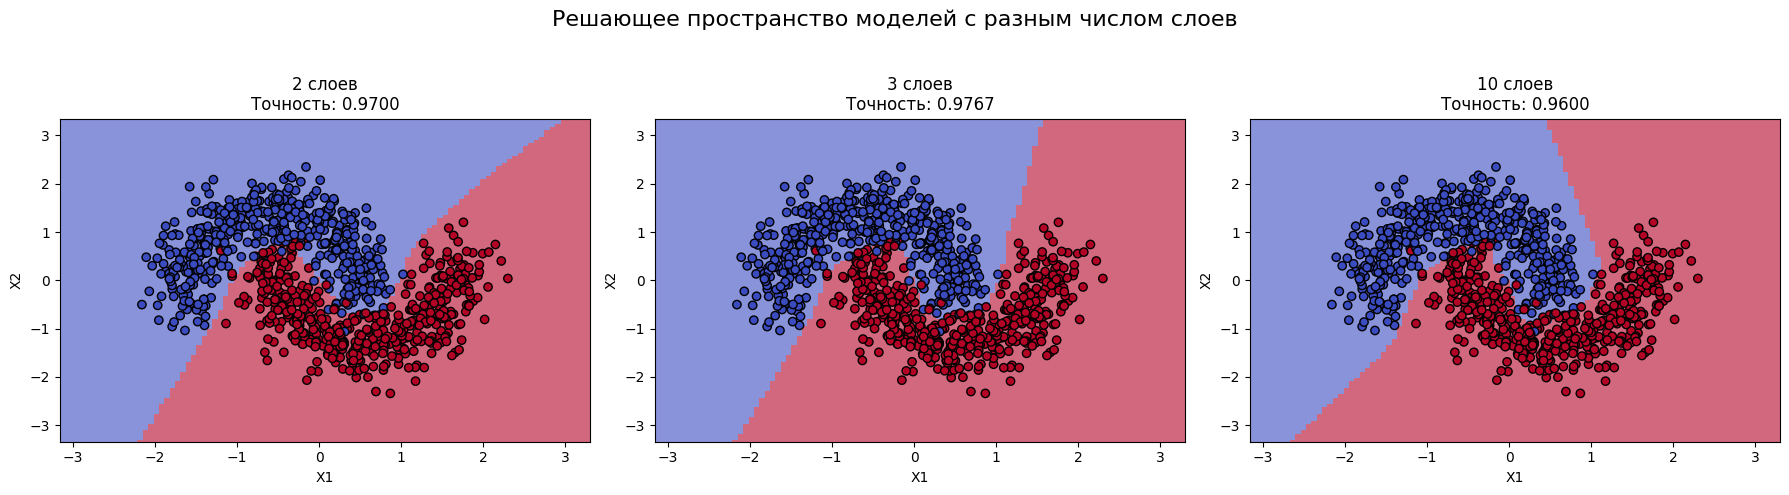

In [29]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = np.vstack((X_train_scaled, X_test_scaled))
y_full = np.hstack((y_train, y_test))

layers = [2, 3, 10]
neurons_per_layer = 10
results = {}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Решающее пространство моделей с разным числом слоев', fontsize=16)

for idx, n_layers in enumerate(layers):
    clf = MLPClassifier(hidden_layer_sizes=[neurons_per_layer] * n_layers, max_iter=5000, random_state=42)
    clf.fit(X_train_scaled, y_train)
    
    y_pred = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[n_layers] = acc

    X0 = np.linspace(X_scaled[:, 0].min()-1, X_scaled[:, 0].max()+1, 100)
    X1 = np.linspace(X_scaled[:, 1].min()-1, X_scaled[:, 1].max()+1, 100)
    X0_grid, X1_grid = np.meshgrid(X0, X1)
    y_predict_grid = clf.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)
    
    ax = axes[idx]
    ax.pcolormesh(X0_grid, X1_grid, y_predict_grid, shading='auto', cmap='coolwarm', alpha=0.6)
    scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_full, edgecolors='black', linewidth=1, cmap='coolwarm')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title(f'{n_layers} слоев\nТочность: {acc:.4f}')
    ax.set_xlim(X0.min(), X0.max())
    ax.set_ylim(X1.min(), X1.max())

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Уже при двух 2 слоях модель хорошо апроксимирует данные, на 10 слоях модель уже хуже себя показывает из-за переобучения

### 3. Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.

In [30]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


clf = MLPClassifier(hidden_layer_sizes=(3, 3, 3), max_iter=5000, random_state=42)
clf.fit(X, y)


for idx, (w, b) in enumerate(zip(clf.coefs_, clf.intercepts_)):
    print(f"\n--- Слой {idx + 1} ---")
    print(f"Форма весов: {w.shape}")
    print(f"Веса:\n{w}")
    print(f"\nФорма смещений: {b.shape}")
    print(f"Смещения (bias):\n{b}")



--- Слой 1 ---
Форма весов: (2, 3)
Веса:
[[-2.17060478e-35  1.16646328e+00  8.38602826e-01]
 [ 4.97283980e-47  2.91166796e-01 -6.53173057e-01]]

Форма смещений: (3,)
Смещения (bias):
[-0.9681903   1.07566775  0.71043376]

--- Слой 2 ---
Форма весов: (3, 3)
Веса:
[[ 7.44174083e-21 -7.60566979e-07  4.82178119e-07]
 [ 6.54722384e-01 -8.78093231e-14 -1.17575893e+00]
 [-9.99605772e-01 -1.68592070e-22 -1.51948713e+00]]

Форма смещений: (3,)
Смещения (bias):
[ 0.44743264 -0.41754172  1.28035862]

--- Слой 3 ---
Форма весов: (3, 3)
Веса:
[[-1.65007785e+00 -6.98980221e-21 -2.91490802e-37]
 [ 2.48711974e-73  6.10589925e-14 -5.06276041e-13]
 [-1.17137254e+00 -4.17990436e-53 -2.09104356e-07]]

Форма смещений: (3,)
Смещения (bias):
[ 1.9469508  -0.65895175 -0.86989681]

--- Слой 4 ---
Форма весов: (3, 1)
Веса:
[[3.41477434e+00]
 [2.49776787e-05]
 [1.47169312e-09]]

Форма смещений: (1,)
Смещения (bias):
[-2.74666668]


### 4. Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.

In [31]:
import time
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Простая модель (1 слой, 5 нейронов)': (MLPClassifier(hidden_layer_sizes=(5,), max_iter=5000, random_state=42)),
    'Сложная модель (5 слоев по 100 нейронов)': (MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=5000, random_state=42))
}

results = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    end_time = time.time()
    
    train_time = end_time - start_time
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    
    results[name] = {
        'accuracy': acc,
        'train_time': train_time
    }
    
    print(f"\n{name}")
    print(f"Точность: {acc:.4f}")
    print(f"Время обучения: {train_time:.4f} секунд")



Простая модель (1 слой, 5 нейронов)
Точность: 0.8833
Время обучения: 0.1373 секунд

Сложная модель (5 слоев по 100 нейронов)
Точность: 0.9767
Время обучения: 0.4636 секунд


In [33]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report


data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = Perceptron(max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Точность на тестовой выборке: {accuracy:.4f}")
print("\nКлассификационный отчет:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Точность на тестовой выборке: 0.9825

Классификационный отчет:

              precision    recall  f1-score   support

   malignant       0.97      0.98      0.98        63
      benign       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



### 6. Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

regressor = MLPRegressor(hidden_layer_sizes=(10,), max_iter=5000, random_state=42)
regressor.fit(X_train_scaled, y_train)

y_pred = regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse:.4f}")
print(f"Коэффициент детерминации (R2): {r2:.4f}")


Среднеквадратичная ошибка (MSE): 0.0722
Коэффициент детерминации (R2): 0.6898


# Контрольные вопросы

### Что называют глубокой нейронной сетью?
Глубокой нейронной сетью называют сеть, содержащую два и более скрытых слоев между входным и выходным слоями.

### Что такое архитектура нейронной сети?
Архитектура нейронной сети — это структура сети: количество слоев, количество нейронов в каждом слое и способ их соединения между собой.

### Как количество нейронов и слоев влияет на качество моделирования?
Большее количество нейронов и слоев позволяет модели захватывать более сложные зависимости, но увеличивает риск переобучения и требует больше вычислительных ресурсов.

### Как нейронная сеть решает задачи множественной классификации?
Нейронная сеть для множественной классификации использует выходной слой с количеством нейронов, равным числу классов, и функцию активации softmax для выдачи вероятностей по классам.

### В каких случаях следует применять перцептрон?
Перцептрон следует применять для простых задач бинарной классификации, где классы можно разделить линейной границей.
